# Entropy

Entropy could be used with probability to denote the gain of information.

The more homogenious the set is - the lower is the level of entropy.
The lower the entropy - the higher the knowledge gain.

If we have a dataset with two classes evenly distributed we get the low knowledge and high entropy.


$$ 
H(x) = -\sum_{i=1}^n p(x_i) \log_2 p(x_i)
$$

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
bugs = pd.read_csv('data/ml-bugs.csv')
bugs.head()

,Species,Color,Length (mm)
0,Mobug,Brown,11.6
1,Mobug,Blue,16.3
2,Lobug,Blue,15.1
3,Lobug,Green,23.7
4,Lobug,Blue,18.4


## Information gain

The goal is to split the data getting the highest information gain - lower entropy.

$$ 
Information Gain = Entropy(Parent) - [\frac{m}{m + n}Entropy(Child_1) + \frac{m}{m + n}Entropy(Child_2)]
$$

## Entropy

In [14]:
def _calculate_entropy(first, total):
    return -(first/total*np.log2(first/total) + (total-first)/total*np.log2((total-first)/total))

def plot_by_species(df:pd.DataFrame, filter_arg:pd.Series = None):
    if filter_arg is None:
        groups = df.groupby('Species')

        fig, ax = plt.subplots(figsize=(16,5))
        ax.margins(0.05)
        for name, group in groups:
            ax.plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
        ax.legend()
        plt.show()
    else:
        true_group = df[filter_arg].groupby('Species')
        false_group = df[~filter_arg].groupby('Species')
        
        fig, axes = plt.subplots(1,2, figsize=(16,5))
        for name, group in true_group:
            axes[0].plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
        axes[0].legend()
        for name, group in false_group:
            axes[1].plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
        axes[1].legend()
        plt.show()
        
def calculate_entropies(df:pd.DataFrame, parent_filter:pd.Series = bugs['Species']=='Mobug', child_filter:pd.Series = None):
    total_count = df.count()[0]
    g1_count = df[parent_filter].count()[0]
    parent_entropy = _calculate_entropy(g1_count, total_count)
    if child_filter is not None:
        child_count = df[child_filter].count()[0]
        g1_child_count = df[child_filter & parent_filter].count()[0]
        child1_entropy = _calculate_entropy(g1_child_count, child_count)*(child_count/total_count)
        child_count = df[~child_filter].count()[0]
        g1_count = df[~child_filter & parent_filter].count()[0]
        g2_count = df[~child_filter & ~parent_filter].count()[0]
        child2_entropy = _calculate_entropy(g1_child_count, child_count)*(child_count/total_count)
        information_gain = parent_entropy - (child1_entropy + child2_entropy)
        return parent_entropy, (child1_entropy, child2_entropy), information_gain
    return parent_entropy

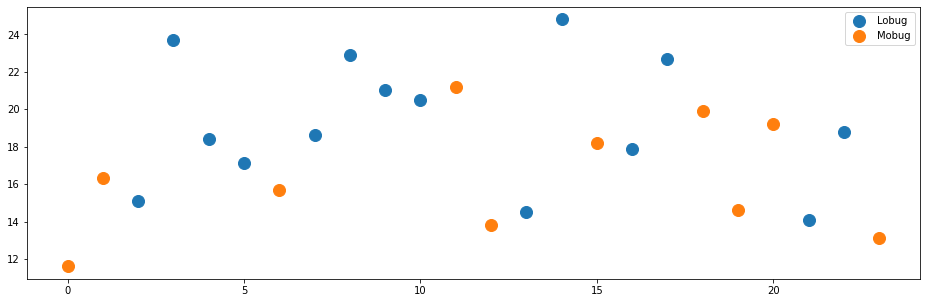

Parent entropy: 0.9798687566511528


In [15]:
plot_by_species(bugs)
print('Parent entropy: {}'.format(calculate_entropies(bugs)))

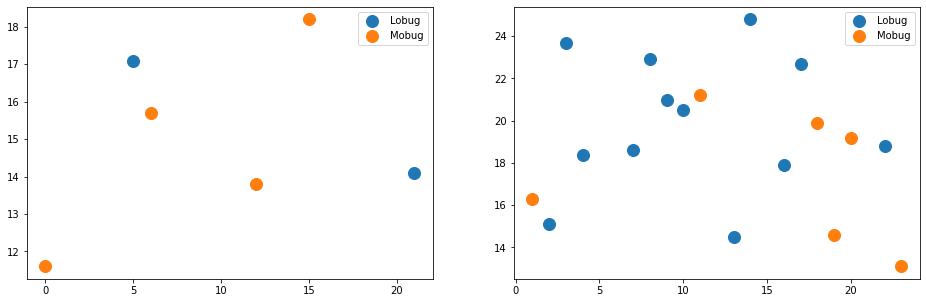

Parent entropy: 0.9798687566511528, Childs entropy: (0.2295739585136224, 0.5731533798814652), Information gain 0.17714141825606522


In [16]:
split_by = bugs['Color']=='Brown'
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropies(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

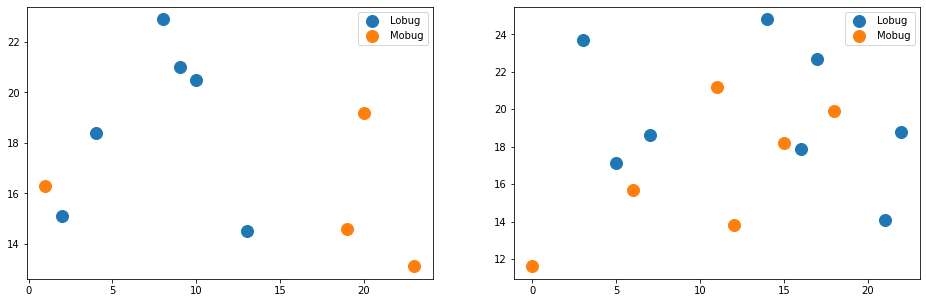

Parent entropy: 0.9798687566511528, Childs entropy: (0.4045627476894453, 0.5034869983305348), Information gain 0.07181901063117269


In [18]:
split_by = bugs['Color']=='Blue'
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropies(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

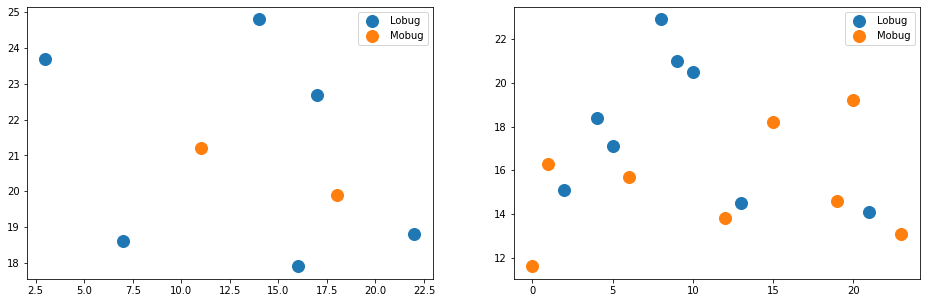

Parent entropy: 0.9798687566511528, Childs entropy: (0.2704260414863776, 0.3623762954663976), Information gain 0.3470664196983776


In [19]:
split_by = bugs['Color']=='Green'
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropies(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

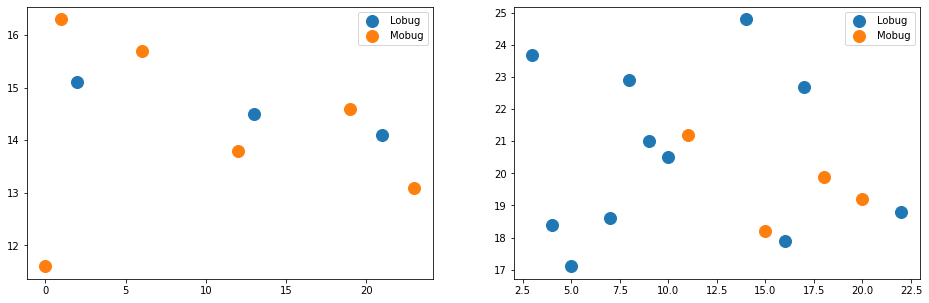

Parent entropy: 0.9798687566511528, Childs entropy: (0.3443609377704336, 0.6068441215341679), Information gain 0.028663697346551276


In [20]:
split_by = bugs['Length (mm)']<17.0
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropies(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

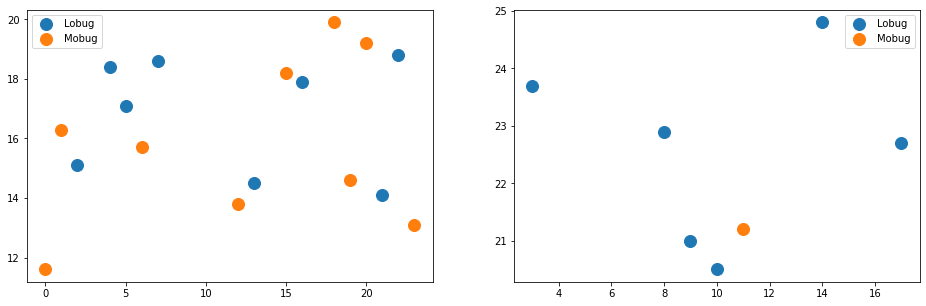

Parent entropy: 0.9798687566511528, Childs entropy: (0.7065643036781234, nan), Information gain nan


<ipython-input-14-e6d74acb670d>:2: RuntimeWarning: invalid value encountered in log2
  return -(first/total*np.log2(first/total) + (total-first)/total*np.log2((total-first)/total))


In [22]:
split_by = bugs['Length (mm)']<20.0
plot_by_species(bugs, split_by)
parent_entropy, childs_entropy, information_gain = calculate_entropies(bugs,child_filter=split_by)
print('Parent entropy: {}, Childs entropy: {}, Information gain {}'.format(parent_entropy, childs_entropy, information_gain))

In [94]:
#Parent entropy:
mobugs = bugs[bugs['Species']=='Mobug'].count()[0]
lobugs = bugs[bugs['Species']=='Lobug'].count()[0]
all_bugs = mobugs+lobugs
print('No of mobugs: {}, no of lobugs: {}'.format(mobugs, lobugs))

entropy = -(lobugs/all_bugs)*math.log(lobugs/all_bugs) - (mobugs/all_bugs)*math.log(mobugs/all_bugs)
print('Parent entropy: {}'.format(entropy))

No of mobugs: 10, no of lobugs: 14
Parent entropy: 0.6791932659915256
